<a href="https://colab.research.google.com/github/maycmesquia/Houses_Kaggle/blob/main/Regress%C3%A3o_Linear_Houses_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices - Advanced Regression Techniques - Objetivo: RMSE <= 0.11900
**Meta**

É sua função prever o preço de venda de cada casa. Para cada Id no conjunto de teste, você deve prever o valor da variável SalePrice. 

**Métrica**

Os envios são avaliados com base no erro quadrático médio (RMSE)  entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (Tirar logs significa que erros na previsão de casas caras e casas baratas afetarão o resultado igualmente.)

**Qualificação Inicial 200ª ou superior**

Erro quadratico médio igual ou inferior a: 0.11928

Ideal valor 0.11900

Link: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

## Preparando ambiente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, normaltest, spearmanr, chi2_contingency

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importando os Dados

In [ ]:
end = '/content/drive/MyDrive/Colab Notebooks/Kaggle - Competicoes/House Prices - Advanced Regression Techniques/'
train = pd.read_csv(end + 'train.csv')
test = pd.read_csv(end + 'test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
excluir = ['Alley']
train.drop(excluir, axis=1, inplace= True)
test.drop(excluir, axis=1, inplace=True)

In [ ]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [ ]:
variaveis_quantitativas = []
variaveis_qualitativas = []

for coluna in train.columns:
    if train[coluna].dtype == 'int64' or train[coluna].dtype == 'float64':
        variaveis_quantitativas.append(coluna)
    else:
        variaveis_qualitativas.append(coluna)

variaveis_quantitativas.remove('SalePrice')
variaveis_quantitativas.remove('Id')

print(variaveis_quantitativas)
print(variaveis_qualitativas)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Pave

## Limpesa dos Dados


In [ ]:
var='LotFrontage'
test[var].min(), test[var].mean(), test[var].median(), test[var].max()

(21.0, 68.58035714285714, 67.0, 200.0)

In [ ]:
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(), inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median(), inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median(), inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median(), inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median(), inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].median(), inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].median(), inplace=True)
test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

----------------

In [ ]:
test[test['KitchenQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [ ]:
train[train['KitchenQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
for variavel in variaveis_qualitativas:
    if test[variavel].isna().sum() > 0:
        print(variavel, test[variavel].isna().sum())
        test[variavel].fillna('NA', inplace=True)

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinType2 42
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageFinish 78
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [ ]:
for variavel in variaveis_qualitativas:
    if train[variavel].isna().sum() > 0:
        print(variavel, train[variavel].isna().sum())
        train[variavel].fillna('NA', inplace=True)

MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


## Observando Outliers


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [ ]:
train[variaveis_quantitativas].var()

MSSubClass       1.789338e+03
LotFrontage      4.850576e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.266383e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      5.758570e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal   

In [ ]:
pd.value_counts
train['MSSubClass'].count()

1460

In [ ]:
train['MSSubClass'][train['MSSubClass']> 145].count()

103

In [ ]:
train[train['EnclosedPorch']>0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
14,15,20,RL,70.049958,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
21,22,45,RM,57.000000,7449,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,637,637,GasA,Ex,Y,FuseF,1108,0,0,1108,0,0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,TA,N,0,0,205,0,0,0,NA,GdPrv,NA,0,6,2007,WD,Normal,139400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,70.049958,12546,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NA,NA,NA,0,4,2007,WD,Normal,182900
1438,1439,20,RM,90.000000,7407,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,6,7,1957,1996,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,600,Unf,0,312,912,GasA,TA,Y,FuseA,1236,0,0,1236,1,0,1,0,2,1,TA,6,Typ,0,NA,Attchd,1957.0,Unf,2,923,TA,TA,Y,0,158,158,0,0,0,NA,MnPrv,NA,0,4,2010,WD,Normal,149700
1439,1440,60,RL,80.000000,11584,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,7,6,1979,1979,Hip,CompShg,HdBoard,HdBoard,BrkFace,96.0,TA,TA,CBlock,TA,TA,No,GLQ,315,Rec,110,114,539,GasA,TA,Y,SBrkr,1040,685,0,1725,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1979.0,RFn,2,550,TA,TA,Y,0,88,216,0,0,0,NA,NA,NA,0,11,2007,WD,Normal,197000
1445,1446,85,RL,70.000000,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,

In [ ]:
for variavel in variaveis_quantitativas:
    iqr = (train[variavel].quantile(0.75) - train[variavel].quantile(0.25))*1.5
    max = train[variavel].quantile(0.75) + iqr
    min = train[variavel].quantile(0.25) - iqr
    outlier = train[variavel][train[variavel]>max].count()
    outlier += train[variavel][train[variavel]<min].count()
    if outlier >0:
        print(variavel, outlier)


MSSubClass 103
LotFrontage 106
LotArea 69
OverallQual 2
OverallCond 125
YearBuilt 7
MasVnrArea 98
BsmtFinSF1 7
BsmtFinSF2 167
BsmtUnfSF 29
TotalBsmtSF 61
1stFlrSF 20
2ndFlrSF 2
LowQualFinSF 26
GrLivArea 31
BsmtFullBath 1
BsmtHalfBath 82
BedroomAbvGr 35
KitchenAbvGr 68
TotRmsAbvGrd 30
Fireplaces 5
GarageYrBlt 1
GarageCars 5
GarageArea 21
WoodDeckSF 32
OpenPorchSF 77
EnclosedPorch 208
3SsnPorch 24
ScreenPorch 116
PoolArea 7
MiscVal 52


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500000,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0


## Considerando variaveis Categoricas

In [ ]:
df_train = pd.get_dummies(data=train, columns=variaveis_qualitativas)
df_test = pd.get_dummies(data=test, columns=variaveis_qualitativas)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 303 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(265)
memory usage: 811.4 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(253)
memory usage: 782.3 KB


In [ ]:
verificar = []
for coluna in df_train.columns:
    if coluna in df_test.columns:
        pass
    else:
        verificar.append(coluna)


print(verificar)

['SalePrice', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'Electrical_NA', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']


Infelizmente algumas das classificacoes das variaveis categoricas existentes nos dados de **Treino** não existem nos dados de **Teste**, com isso terei que verificar se esses valores tem influencia na variavel predita *SalePrice*



---



Os metodos de Spearman e Qui-quadrado, servem para validar a correlação de variaveis

**Pré-suposto para o método de Spearman:**
- Não apresentar distribuição Normal
- As variaveis tem que ser Ordinais
- As variaveis são não linearmente relacionadas


**Obs:**
Utilizar Pearson quando a distribuição for Normal, utilizar Spearman quando a distribuição não for normal!

In [ ]:
coeficiente, p_valor = spearmanr(df_train['SalePrice'], df_train['Utilities_NoSeWa'])
print(f'Correlação de Spearman {coeficiente:0.3}, P_valor: {p_valor:0.3}')

tab = pd.crosstab(df_train['SalePrice'], df_train['Utilities_NoSeWa'])
chi2, p, dof, exp = chi2_contingency(tab.values)
print(f'Qui-quadrado: {chi2:0.3} - P_valor: {p:0.3}')

Correlação de Spearman -0.0167, P_valor: 0.523
Qui-quadrado: 2.42e+02 - P_valor: 1.0


In [ ]:
res, p_normal = normaltest(df_train['SalePrice'])
p_normal

2.283848353787728e-133

In [ ]:
coef, p_pearson = pearsonr(df_train['SalePrice'], df_train['Utilities_NoSeWa'])
p_pearson, coef

(0.5847167739692756, -0.014314296147248773)

In [ ]:
excluir = []
observar = []
for variavel in verificar:
    res_normal, p_normal = normaltest(df_train[variavel])

    if p_normal <= 0.05:
        coef_pearson, p_pearson = pearsonr(df_train['SalePrice'], df_train[variavel])
        tab = pd.crosstab(df_train['SalePrice'], df_train[variavel])
        chi2, p_chi2, dof, exp = chi2_contingency(tab.values)
        if p_chi2 > 0.05:
            print(f'Excluir variavel(Normal): {variavel:30} - Coef. Pearson: {coef_pearson:0.3}, PValor_Chi²: {p_chi2:0.3}')
            excluir.append(variavel)
        elif -0.2 < coef_pearson < 0.2:
            print(f'Excluir variavel(Normal): {variavel:30} - Coef. Pearson: {coef_pearson:0.3}, PValor_Chi²: {p_chi2:0.3}')
            excluir.append(variavel)
        else:
            print(f'*** Variavel: {variavel:30} - Coef. Pearson: {coef_pearson:0.3}, PValor_Chi²: {p_chi2:0.3}')
            observar.append(variavel)

    elif p_normal > 0.05:
        coef_spearman, p_spearman = spearmanr(df_train['SalePrice'], df_train[variavel])
        tab = pd.crosstab(df_train['SalePrice'], df_train[variavel])
        chi2, p_chi2, dof, exp = chi2_contingency(tab.values)
        if p_chi2 > 0.05:
            print(f'Excluir variavel: {variavel} - Coef. Spearman: {coef_spearman:0.3}, PValor_Chi²: {p_chi2:0.3}')
            excluir.append(variavel)
        elif -0.2 < coef_spearman < 0.2:
            print(f'Excluir variavel: {variavel} - Coef. Spearman: {coef_spearman:0.3}, PValor_Chi²: {p_chi2:0.3}')
            excluir.append(variavel)
        else:
            print(f'** Variavel: {variavel} - Coef. Spearman: {coef_spearman:0.3}, PValor_Chi²: {p_chi2:0.3}')
            observar.append(variavel)
print(excluir)
df_train.drop(excluir, axis=1, inplace =True)

*** Variavel: SalePrice                      - Coef. Pearson: 1.0, PValor_Chi²: 0.0
Excluir variavel(Normal): Utilities_NoSeWa               - Coef. Pearson: -0.0143, PValor_Chi²: 1.0
Excluir variavel(Normal): Condition2_RRAe                - Coef. Pearson: 0.00299, PValor_Chi²: 1.0
Excluir variavel(Normal): Condition2_RRAn                - Coef. Pearson: -0.0145, PValor_Chi²: 4.69e-62
Excluir variavel(Normal): Condition2_RRNn                - Coef. Pearson: -0.0393, PValor_Chi²: 0.000144
Excluir variavel(Normal): HouseStyle_2.5Fin              - Coef. Pearson: 0.0365, PValor_Chi²: 1.05e-08
Excluir variavel(Normal): RoofMatl_ClyTile               - Coef. Pearson: -0.0069, PValor_Chi²: 1.0
Excluir variavel(Normal): RoofMatl_Membran               - Coef. Pearson: 0.02, PValor_Chi²: 0.0349
Excluir variavel(Normal): RoofMatl_Metal                 - Coef. Pearson: -0.000304, PValor_Chi²: 1.0
Excluir variavel(Normal): RoofMatl_Roll                  - Coef. Pearson: -0.0145, PValor_Chi²: 1.0


## Modelo I - RMSE 0,35101

Utilizando somente as variaveis quantitativas

In [ ]:
X_treino = train.drop(variaveis_qualitativas, axis=1)
X_treino = X_treino.drop('SalePrice', axis=1)
y_treino = train['SalePrice']
X_test = test.drop(variaveis_qualitativas, axis=1)

X_treino.shape, y_treino.shape, X_test.shape

((1460, 37), (1460,), (1459, 37))

In [ ]:
lr = LinearRegression().fit(X_treino, y_treino)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
sub = pd.Series(y_pred, index=X_test['Id'], name='SalePrice')
sub.shape

(1459,)

In [ ]:
arquivo = '/content/drive/Othercomputers/Meu laptop/Competicoes Kaggle/'
sub.to_csv(arquivo + 'I_modelo', header=True)

## Modelo II - RMSE 0.47114
Erro Quadratico Médio (RMSE): 0.47114

In [ ]:
retirar = ['Id', 'SalePrice']
X_treino = df_train.drop(retirar, axis=1)
y_treino = df_train['SalePrice']
X_test = df_test.drop('Id', axis=1)

X_treino.shape, y_treino.shape, X_test.shape

((1460, 268), (1460,), (1459, 268))

In [ ]:
lr = LinearRegression().fit(X_treino, y_treino)

In [ ]:
previsao = lr.predict(X_test)

df_prev = pd.Series(previsao, index=df_test['Id'], name='SalePrice')

arquivo = '/content/drive/Othercomputers/Meu laptop/Competicoes Kaggle/'

df_prev.to_csv(arquivo + 'II_Modelo_Houses', header=True)

## Retirando variaveis 


In [ ]:
var_list = list(df_train.columns)
var_list.remove('Id')
var_list

In [ ]:
excluir = []
observar = []
for variavel in var_list:
    res_normal, p_normal = normaltest(df_train[variavel])

    if p_normal >= 0.05:
        coef_pearson, p_pearson = pearsonr(df_train['SalePrice'], df_train[variavel])
        tab = pd.crosstab(df_train['SalePrice'], df_train[variavel])
        chi2, p_chi2, dof, exp = chi2_contingency(tab.values)
        if p_chi2 > 0.05:
            print(f'Excluir variavel(Normal): {variavel:30} - Coef. Pearson: {coef_pearson:0.3}, PValor_Chi²: {p_chi2:0.3}')
            excluir.append(variavel)
        elif -0.2 < coef_pearson < 0.2:
            print(f'Excluir variavel(Normal): {variavel:30} - Coef. Pearson: {coef_pearson:0.3}, PValor_Chi²: {p_chi2:0.3}')
            excluir.append(variavel)
        else:
            print(f'*** Variavel: {variavel:30} - Coef. Pearson: {coef_pearson:0.3}, PValor_Chi²: {p_chi2:0.3}')
            observar.append(variavel)

    elif p_normal < 0.05:
        coef_spearman, p_spearman = spearmanr(df_train['SalePrice'], df_train[variavel])
        tab = pd.crosstab(df_train['SalePrice'], df_train[variavel])
        chi2, p_chi2, dof, exp = chi2_contingency(tab.values)
        if p_chi2 > 0.05:
            print(f'Excluir variavel: {variavel} - Coef. Spearman: {coef_spearman:0.3}, PValor_Chi²: {p_chi2:0.3}')
            excluir.append(variavel)
        elif -0.2 < coef_spearman < 0.2:
            print(f'Excluir variavel: {variavel} - Coef. Spearman: {coef_spearman:0.3}, PValor_Chi²: {p_chi2:0.3}')
            excluir.append(variavel)
        else:
            print(f'** Variavel: {variavel} - Coef. Spearman: {coef_spearman:0.3}, PValor_Chi²: {p_chi2:0.3}')
            observar.append(variavel)
print(excluir)


Excluir variavel(Normal): MSSubClass                     - Coef. Pearson: -0.0843, PValor_Chi²: 0.993
*** Variavel: LotFrontage                    - Coef. Pearson: 0.335, PValor_Chi²: 8.6e-113
*** Variavel: LotArea                        - Coef. Pearson: 0.264, PValor_Chi²: 4.26e-99
*** Variavel: OverallQual                    - Coef. Pearson: 0.791, PValor_Chi²: 5.49e-157
Excluir variavel(Normal): OverallCond                    - Coef. Pearson: -0.0779, PValor_Chi²: 1.7e-20
Excluir variavel(Normal): YearBuilt                      - Coef. Pearson: 0.523, PValor_Chi²: 1.0
Excluir variavel(Normal): YearRemodAdd                   - Coef. Pearson: 0.507, PValor_Chi²: 1.0
*** Variavel: MasVnrArea                     - Coef. Pearson: 0.473, PValor_Chi²: 1.15e-183
Excluir variavel(Normal): BsmtFinSF1                     - Coef. Pearson: 0.386, PValor_Chi²: 1.0
Excluir variavel(Normal): BsmtFinSF2                     - Coef. Pearson: -0.0114, PValor_Chi²: 1.0
*** Variavel: BsmtUnfSF           

In [ ]:
rng = np.random.default_rng()
pts = 1000
a = rng.normal(0, 1, size=pts)
b = rng.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = normaltest(x)
alpha = 0.05
print(k2)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


61.53722767080128
p = 4.33871e-14
The null hypothesis can be rejected


In [ ]:
df_train.drop(excluir, axis=1, inplace=True)
df_test.drop(excluir, axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 60), (1459, 59))

In [ ]:
df_train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'LotShape_IR1',
       'LotShape_Reg', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'CentralAir_N', 'CentralAir_Y',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Ex',
       'FireplaceQu_Gd', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageFinis

## Modelo III - RMSE 0.16057


In [ ]:
retirar = ['Id', 'SalePrice']
X_treino = df_train.drop(retirar, axis=1)
y_treino = df_train['SalePrice']
X_test = df_test.drop('Id', axis=1)

X_treino.shape, y_treino.shape, X_test.shape

((1460, 58), (1460,), (1459, 58))

In [ ]:
lr = LinearRegression().fit(X_treino, y_treino)

In [ ]:
previsao = lr.predict(X_test)

df_prev = pd.Series(previsao, index=df_test['Id'], name='SalePrice')

arquivo = '/content/drive/Othercomputers/Meu laptop/Competicoes Kaggle/'

df_prev.to_csv(arquivo + 'III_Modelo_Houses', header=True)

## Modelo IV - RMSE 0.30193

In [ ]:
variaveis_qualitativas

In [ ]:
train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NA'], dtype=object)

Para as variaveis **Qualitativas**, devemos utilizar o teste de Spearman, (compara se dois conjuntos de dados são correlacionados, podendo um deles ser qualitativos, ou podendo um ou os dois não seguirem uma distribuição Normal)

Ele tem uma hipotese nula $H_0$(Os conjuntos de dados não são correlacionados)

Caso o $P_{valor}$ seja inferior a significancia (0.05) Devemos rejeitar a $H_0$, e aceitar que os dados tem correlação.

In [ ]:
significancia = 0.05
qual_excluir = []
qual_manter = []
for variavel in variaveis_qualitativas:
    coef_spearman, p_spearman = spearmanr(train['SalePrice'], train[variavel], nan_policy='omit')
    if p_spearman > significancia:
        print(f'Excluir variavel: {variavel:15} - Pvalor: {p_spearman:0.3} superior a significancia {significancia}')
        qual_excluir.append(variavel)
    elif -0.3 < coef_spearman < 0.3:
        print(f'Excluir variavel: {variavel:15} - coeficiente de correlação: {coef_spearman:0.3}, correlação fraca entre -0.2 e 0.2')
        qual_excluir.append(variavel)
    else:
        print(f'*Manter Variavel: {variavel:15} - Coef. Spearman: {coef_spearman:0.3}, Pvalor_Spearman: {p_spearman:0.3}')
        qual_manter.append(variavel)

print(len(qual_manter))

*Manter Variavel: MSZoning        - Coef. Spearman: -0.335, Pvalor_Spearman: 1.34e-39
Excluir variavel: Street          - Pvalor: 0.0801 superior a significancia 0.05
*Manter Variavel: LotShape        - Coef. Spearman: -0.306, Pvalor_Spearman: 5.27e-33
Excluir variavel: LandContour     - Pvalor: 0.696 superior a significancia 0.05
Excluir variavel: Utilities       - Pvalor: 0.523 superior a significancia 0.05
Excluir variavel: LotConfig       - coeficiente de correlação: -0.0742, correlação fraca entre -0.2 e 0.2
Excluir variavel: LandSlope       - Pvalor: 0.0546 superior a significancia 0.05
Excluir variavel: Neighborhood    - coeficiente de correlação: 0.166, correlação fraca entre -0.2 e 0.2
Excluir variavel: Condition1      - coeficiente de correlação: 0.187, correlação fraca entre -0.2 e 0.2
Excluir variavel: Condition2      - coeficiente de correlação: 0.0616, correlação fraca entre -0.2 e 0.2
Excluir variavel: BldgType        - coeficiente de correlação: -0.12, correlação fraca 

In [ ]:
qual_manter

['MSZoning',
 'LotShape',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleCondition']

Para as variaveis **Quantitativas** devemos verificar se 'SalePrice' tem uma distribuição *Normal*

Caso sim, devemos verificar se as outras variaveis também tem uma distribuição *Normal*

Caso as duas tenham distribuição *Normal* aplicaremos o teste de correlação de  **Pearson** para as duas variaveis

Caso uma delas não tenham distribuição *Normal* devemos aplicar o teste de correlação de **Spearman**

In [ ]:
significancia = 0.05
k_test, p_normal = normaltest(train['SalePrice'])
if p_normal < significancia:
    print(f'Rejeitamos H0: a distribuição não é NORMAL, Pvalor: {p_normal}')
else:
    print(f'Concordamos com H: a distribuição é NORMAL, Pvalor: {p_normal}')

Rejeitamos H0: a distribuição não é NORMAL, Pvalor: 2.283848353787728e-133


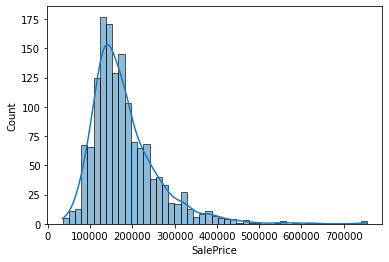

In [ ]:
sns.histplot(train['SalePrice'], kde=True)

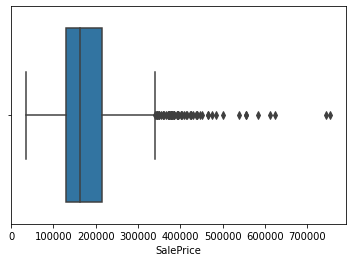

In [ ]:
sns.boxplot(data=train, x='SalePrice')

Já que a variavel a ser predita, **SalePrice**, não tem uma distribuição Normal, deveremos utilizar o teste de correlação de **Spearman**

In [ ]:
significancia = 0.05
quant_excluir = []
quant_manter = []
for variavel in variaveis_quantitativas:
    coef_spearman, p_spearman = spearmanr(train['SalePrice'], train[variavel], nan_policy='omit')
    if p_spearman > significancia:
        print(f'Excluir variavel: {variavel:15} - Pvalor: {p_spearman:0.3} superior a significancia {significancia}')
        quant_excluir.append(variavel)
    elif -0.3 < coef_spearman < 0.3:
        print(f'Excluir variavel: {variavel:15} - coeficiente de correlação: {coef_spearman:0.3}, correlação fraca entre -0.2 e 0.2')
        quant_excluir.append(variavel)
    else:
        print(f'*Manter Variavel: {variavel:15} - Coef. Spearman: {coef_spearman:0.3}, Pvalor_Spearman: {p_spearman:0.3}')
        quant_manter.append(variavel)

print(len(quant_manter))

Excluir variavel: MSSubClass      - Pvalor: 0.784 superior a significancia 0.05
*Manter Variavel: LotFrontage     - Coef. Spearman: 0.391, Pvalor_Spearman: 1.62e-54
*Manter Variavel: LotArea         - Coef. Spearman: 0.456, Pvalor_Spearman: 4.87e-76
*Manter Variavel: OverallQual     - Coef. Spearman: 0.81, Pvalor_Spearman: 0.0
Excluir variavel: OverallCond     - coeficiente de correlação: -0.129, correlação fraca entre -0.2 e 0.2
*Manter Variavel: YearBuilt       - Coef. Spearman: 0.653, Pvalor_Spearman: 5.69e-178
*Manter Variavel: YearRemodAdd    - Coef. Spearman: 0.571, Pvalor_Spearman: 3.56e-127
*Manter Variavel: MasVnrArea      - Coef. Spearman: 0.416, Pvalor_Spearman: 3.71e-62
*Manter Variavel: BsmtFinSF1      - Coef. Spearman: 0.302, Pvalor_Spearman: 3.86e-32
Excluir variavel: BsmtFinSF2      - Pvalor: 0.138 superior a significancia 0.05
Excluir variavel: BsmtUnfSF       - coeficiente de correlação: 0.185, correlação fraca entre -0.2 e 0.2
*Manter Variavel: TotalBsmtSF     - Coef

In [ ]:
coef_spearman, p_spearman = spearmanr(train['SalePrice'], train['Street'])
#coef_pearson, p_pearson = pearsonr(train['SalePrice'], train['Street'])
tab = pd.crosstab(train['SalePrice'], train['Street'])
chi2, p_chi2, dof, exp = chi2_contingency(tab.values)



coef_spearman, chi2

(0.045814187076882375, 888.3129945096932)

### Limpeza nos dados

Gerar um novo data_frame e gerar um novo dummies, para teste e treino

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [ ]:
df_train = train.drop(quant_excluir, axis=1)
df_test = test.drop(quant_excluir, axis=1)
df_train = df_train.drop(qual_excluir, axis=1)
df_test = df_test.drop(qual_excluir, axis=1)

df_train.shape, df_test.shape

((1460, 34), (1459, 33))

In [ ]:
df_train.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,...,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,2003,2003,196.0,706,856,856,1710,2,1,8,0,2003.0,2,548,0,61,208500,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,1976,1976,0.0,978,1262,1262,1262,2,0,6,1,1976.0,2,460,298,0,181500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,2001,2002,162.0,486,920,920,1786,2,1,6,1,2001.0,2,608,0,42,223500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,1915,1970,0.0,216,756,961,1717,1,0,7,1,1998.0,3,642,0,35,140000,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,2000,2000,350.0,655,1145,1145,2198,2,1,9,1,2000.0,3,836,192,84,250000,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_train = pd.get_dummies(data=df_train, columns=qual_manter)
df_train.head()

KeyError: ignored

In [ ]:
df_test = pd.get_dummies(data=df_test, columns=qual_manter)
df_test.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_C (all),MSZoning_FV,MSZoning_NA,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,...,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_NA,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,5,1961,1961,0.0,468.0,882.0,896,896,1,0,5,0,1961.0,1.0,730.0,140,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,81.0,14267,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,74.0,13830,5,1997,1998,0.0,791.0,928.0,928,1629,2,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,78.0,9978,6,1998,1998,20.0,602.0,926.0,926,1604,2,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,43.0,5005,8,1992,1992,0.0,263.0,1280.0,1280,1280,2,0,5,0,1992.0,2.0,506.0,0,82,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_test.drop('MSZoning_NA', axis=1, inplace=True)
df_test.drop('KitchenQual_NA', axis=1, inplace=True)

In [ ]:
verificar = []
for coluna in df_train.columns:
    if coluna in df_test.columns:
        pass
    else:
        verificar.append(coluna)

verificar.remove('SalePrice')
print(verificar)

['GarageQual_Ex']


In [ ]:
significancia = 0.05
excluir = []
manter = []
for variavel in verificar:
    coef_spearman, p_spearman = spearmanr(df_train['SalePrice'], df_train[variavel], nan_policy='omit')
    if p_spearman > significancia:
        print(f'Excluir variavel: {variavel:15} - Pvalor: {p_spearman:0.3} superior a significancia {significancia}')
        excluir.append(variavel)
    elif -0.2 < coef_spearman < 0.2:
        print(f'Excluir variavel: {variavel:15} - coeficiente de correlação: {coef_spearman:0.3}, correlação fraca entre -0.2 e 0.2')
        excluir.append(variavel)
    else:
        print(f'*Manter Variavel: {variavel:15} - Coef. Spearman: {coef_spearman:0.3}, Pvalor_Spearman: {p_spearman:0.3}')
        manter.append(variavel)

for variavel in excluir:
        df_train.drop(variavel, axis=1, inplace=True)
print(len(manter))

Excluir variavel: GarageQual_Ex   - Pvalor: 0.851 superior a significancia 0.05
0


In [ ]:
significancia = 0.05
excluir = []
manter = []
for variavel in df_train.columns:
    coef_spearman, p_spearman = spearmanr(df_train['SalePrice'], df_train[variavel], nan_policy='omit')
    if p_spearman > significancia:
        print(f'Excluir variavel: {variavel:15} - Pvalor: {p_spearman:0.3} superior a significancia {significancia}')
        excluir.append(variavel)
    elif -0.5 < coef_spearman < 0.5:
        print(f'Excluir variavel: {variavel:15} - coeficiente de correlação: {coef_spearman:0.3}, correlação fraca entre -0.2 e 0.2')
        excluir.append(variavel)
    else:
        print(f'*Manter Variavel: {variavel:15} - Coef. Spearman: {coef_spearman:0.3}, Pvalor_Spearman: {p_spearman:0.3}')
        manter.append(variavel)

excluir.remove('Id')

df_train.drop(excluir, axis=1, inplace=True)
df_test.drop(excluir, axis=1, inplace=True)
print(len(manter))
df_train.shape, df_test.shape

Excluir variavel: Id              - Pvalor: 0.479 superior a significancia 0.05
Excluir variavel: LotFrontage     - coeficiente de correlação: 0.391, correlação fraca entre -0.2 e 0.2
Excluir variavel: LotArea         - coeficiente de correlação: 0.456, correlação fraca entre -0.2 e 0.2
*Manter Variavel: OverallQual     - Coef. Spearman: 0.81, Pvalor_Spearman: 0.0
*Manter Variavel: YearBuilt       - Coef. Spearman: 0.653, Pvalor_Spearman: 5.69e-178
*Manter Variavel: YearRemodAdd    - Coef. Spearman: 0.571, Pvalor_Spearman: 3.56e-127
Excluir variavel: MasVnrArea      - coeficiente de correlação: 0.416, correlação fraca entre -0.2 e 0.2
Excluir variavel: BsmtFinSF1      - coeficiente de correlação: 0.302, correlação fraca entre -0.2 e 0.2
*Manter Variavel: TotalBsmtSF     - Coef. Spearman: 0.603, Pvalor_Spearman: 4.16e-145
*Manter Variavel: 1stFlrSF        - Coef. Spearman: 0.575, Pvalor_Spearman: 1.78e-129
*Manter Variavel: GrLivArea       - Coef. Spearman: 0.731, Pvalor_Spearman: 1.43e

((1460, 19), (1459, 18))

### Gerando modelo e predição

In [ ]:
retirar = ['Id', 'SalePrice']

X_treino = df_train.drop(retirar, axis=1)
y_treino = df_train['SalePrice']
X_test = df_test.drop('Id', axis=1)

X_treino.shape, y_treino.shape, X_test.shape

((1460, 17), (1460,), (1459, 17))

In [ ]:
modelo_iv = LinearRegression().fit(X_treino, y_treino)

In [ ]:
previsao = modelo_iv.predict(X_treino)

print(np.sqrt(mean_squared_error(y_true=y_treino, y_pred=previsao))/100000)

0.36258789952207354


In [ ]:
previsao = modelo_iv.predict(X_test)

df_prev = pd.Series(previsao, index=df_test['Id'], name='SalePrice')

arquivo = '/content/drive/Othercomputers/Meu laptop/Competicoes Kaggle/'

df_prev.to_csv(arquivo + 'IV.1_Modelo_Houses', header=True)

## Modelo V - RMSE

In [ ]:
len(variaveis_quantitativas)

36

In [ ]:
variaveis_quantitativas[0]

'MSSubClass'

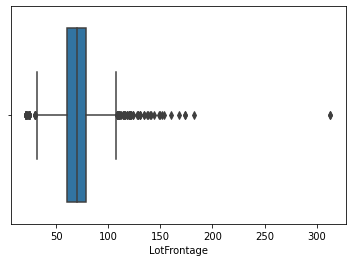

In [ ]:
sns.boxplot(data=train, x=variaveis_quantitativas[1])

In [ ]:
df_train.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_2Story,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,HeatingQC_Ex,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NA,GarageQual_TA,GarageCond_NA,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleCondition_Partial
0,1,65.0,8450,7,2003,2003,196.0,706,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,0,208500,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0
1,2,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,0,181500,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,3,68.0,11250,7,2001,2002,162.0,486,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,0,223500,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0
3,4,60.0,9550,7,1915,1970,0.0,216,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,272,140000,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
4,5,84.0,14260,8,2000,2000,350.0,655,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,0,250000,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0


## Verificação

In [ ]:
pearsonr(train['SalePrice'], train['LotFrontage'])

(0.33490085154055077, 1.3466505607159591e-39)

In [ ]:
coef_spearman, p_spearman = spearmanr(train['SalePrice'], train[qual_manter],axis=1)
p_spearman

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
"""
Para utilizar este teste, precisamos ver q as variaveis 
não podem ter distribuição Normal.

"""



'\nPara utilizar este teste, precisamos ver q as variaveis \nnão podem ter distribuição Normal.\n\n'

Variaveis em escala

**Normalização:**
Coloca os valores em escala relativa entre **0 (Zero)** e **1 (Um)**

**Padronização:**
Ajusta os dados para que tenham uma média igual a **0 (zero)** e variancia igual a **1 (um)**

In [ ]:
from sklearn import preprocessing

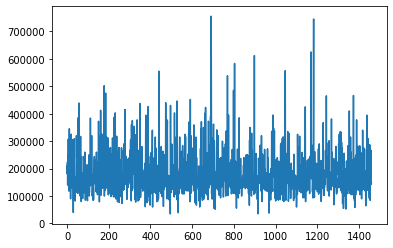

In [ ]:
plt.plot(df_train['SalePrice'])

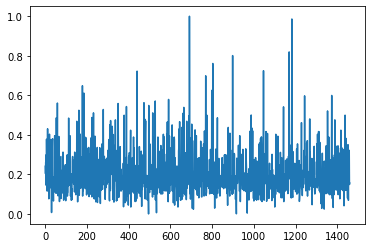

In [ ]:
mat = df_train['SalePrice'].values.reshape(-1,1)
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(mat)
plt.plot(scaled)

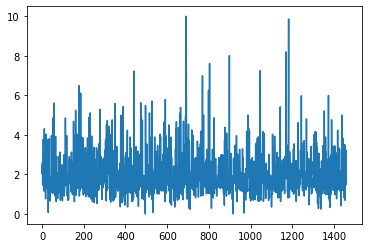

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
scaled = scaler.fit_transform(mat)
plt.plot(scaled)

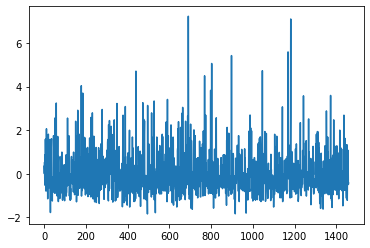

In [ ]:
padronizacao = preprocessing.scale(mat)
plt.plot(padronizacao)

In [ ]:
# TODO: Add import statements
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data.csv',header = None)
X = train_data.iloc[:,:6]
y = train_data.iloc[:,6]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X,y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

teste = LinearRegression().fit(X,y)
# print(teste.coef_)